In [ ]:
# Nome: Leão Pereira Neto
# RA: 22200115

Orientações:

- Preencha nome e RA no Bloco de código a cima;

- Não altere o nome do arquivo. Deve ser enviado o arquivo chamado prova_1.ipynb

- A prova deve ser enviada no formulário: https://forms.gle/sukTCUZNxP5dbNq56

- `Atenção que SÓ É POSSÍVEL RESPONDER AO FORMULÁRIO UMA ÚNICA VEZ!!!` - CERTIFIQUE-SE DE QUE IRÁ ENVIAR O ARQUIVO CORRETO;

- A prova NÃO deve ser enviada para o meu e-mail, apenas pelo formulário;

- Leia atentamente toda a prova;

- A prova pode ser realizada com consulta apenas em materiais das aulas anteriores ou anotações próprias;

- Quem for pego colando terá a nota II;

- Sem conversas paralelas durante a prova, isto pode ser considerado cola;

- Não devem ser criados mais blocos de códigos que os disponíveis na prova (no desenvolvimento do código podem ser criados mais blocos de código, mas antes de enviar devem conter apenas a quantidade de blocos de códigos que estavam disponíveis na prova).

- O notebook deve conter as saídas dos blocos de código referentes às questões que possuem gráficos (não é para limpar a saída dos blocos de código para me enviar).

# 1 - Importar bibliotecas
Deixe todas as importações das bibliotecas utilizadas na prova apenas no bloco de código abaixo. Não deve ter importação de bibliotecas ao longo do código e nem importação bibliotecas que não serão utilizadas no código.

In [4]:
# Bloco de Código para a questão 1
# Preparar dados
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Métricas Classificação
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Métricas Regressão
import sklearn.metrics as sm
import numpy as np

# Criar Modelos
from keras.models import Sequential
from keras.layers import Input, Dense
from keras.layers import Dropout
from keras.regularizers import l1_l2
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.wrappers.scikit_learn import KerasClassifier

# limpar a tela do jupyter
from IPython.display import clear_output

# Otimização
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


# Base de Dados bitcoin.csv

A base de dados contém dados com informações relevantes que afetam o preço do bitcoin.

A base possui 112 colunas, sendo 111 atributos e 1 classe alvo sendo a coluna preco_dia_seguinte.

A base não possuí valores núlos e já possui todas as colunas com o tipo de dados numérico.

Use a base de dados para realizar as questões de 2, 3, 4, 8 e 9

# 2 - Preparar os dados
Separe os dados em X e y

Normalize X e y

Separe X e y em treinamento (80%), validação (10%) e teste (10%)

In [5]:
# Bloco de Código para a questão 2
# Base de dados
df = pd.read_csv('bitcoin.csv')

#  contém todas as colunas do DataFrame, exceto a última coluna (y)
X = df[df.columns[:-1]]
y = df[[df.columns[-1]]]

# redimensionamento dos valores numéricos para o intervalo entre 0 e 1
scaler_X = MinMaxScaler()
X = scaler_X.fit_transform(X)
scaler_y = MinMaxScaler()
y = scaler_y.fit_transform(y)
# treino, teste e validação
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# 3 - Treinar uma Rede Neural
Defina uma rede neural usando o tensorflow e o keras com as seguintes características:
- Definir uma camada de entrada explícita Como "model.add(Input(...".
- 4 Camadas ocultas com função de ativação Relu e 50 neurônios em cada camada oculta.
- Usar o Dropout após as 3 primeiras camadas ocultas (um dropout após cada uma das 3 primeiras camadas), com respectivamente os valores 0.2, 0.3 e 0.4.
- Treine o modelo por 40 épocas usando os dados de treinamento, validação e early stopping com paciência de 15.
- Salve o histórico de loss e loss de validação na variável history.
- Exiba um gráfico de loss e loss de validação com os dados de treinamento e validação durante o treinamento.

15/15 [==============================] - 0s 2ms/step
Root Mean Square Error: 8.96
Mean Square Error: 11010.48
Mean Absolut Error: 90.36
Median Absolut Error: 86.62
Explain Variance Score: 0.0
R2 score: -0.73
Adjusted R2 = -31.2


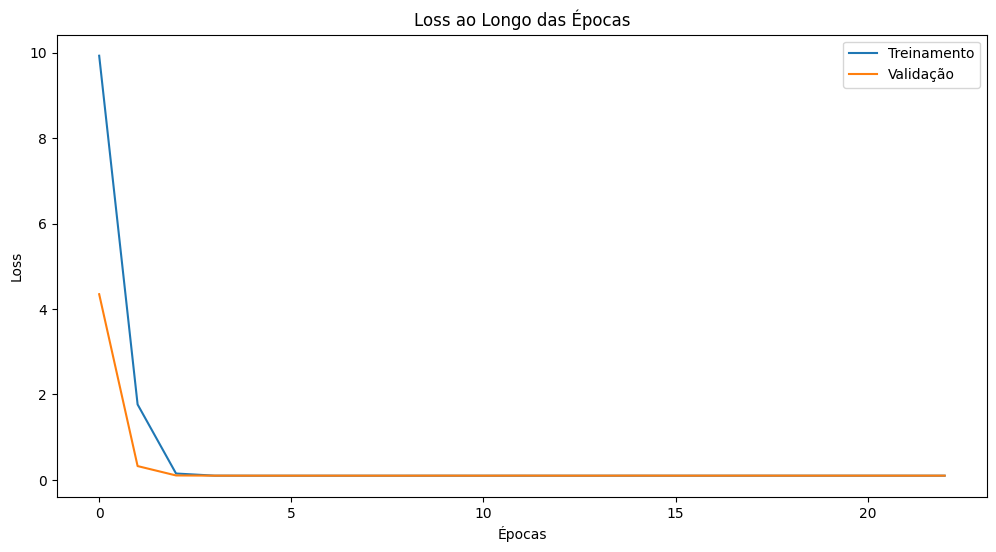

In [6]:
# Bloco de Código para a questão 3

def metricas_regressao(X_test, y_test, scaler_y, model):

    # 1. Fazer previsões usando o modelo fornecido
    predict = model.predict(X_test)

    # 2. Inverter a transformação para obter os valores originais (não normalizados)
    predict = scaler_y.inverse_transform(predict)
    real = scaler_y.inverse_transform(y_test)

    # 3. Calcular R2 e R2 ajustado
    k = X_test.shape[1]  # número de características independentes
    n = len(X_test)  # tamanho da amostra
    r2 = sm.r2_score(real, predict)
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)  # fórmula para R2 ajustado

    # 4. Imprimir métricas
    print('Root Mean Square Error:', round(np.sqrt(np.mean(np.array(predict) - np.array(real))**2), 2))
    print('Mean Square Error:', round(sm.mean_squared_error(real, predict), 2))
    print('Mean Absolut Error:', round(sm.mean_absolute_error(real, predict), 2))
    print('Median Absolut Error:', round(sm.median_absolute_error(real, predict), 2))
    print('Explain Variance Score:', round(sm.explained_variance_score(real, predict) * 100, 2))
    print('R2 score:', round(sm.r2_score(real, predict) * 100, 2))
    print('Adjusted R2 =', round(adj_r2, 3) * 100)

def plot_loss(history):
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Treinamento')
    plt.plot(history.history['val_loss'], label='Validação')
    plt.title('Loss ao Longo das Épocas')
    plt.xlabel('Épocas')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


# Criar modelo
model_regressao = Sequential()
model_regressao.add(Input(shape=(X_train.shape[1],)))  # Camada de entrada explícita
model_regressao.add(Dense(50, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))
model_regressao.add(Dropout(0.2))
model_regressao.add(Dense(50, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))
model_regressao.add(Dropout(0.3))
model_regressao.add(Dense(50, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))
model_regressao.add(Dropout(0.4))
model_regressao.add(Dense(50, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))
model_regressao.add(Dense(1, activation='linear'))  # Saída linear para regressão

# Compilar modelo
model_regressao.compile(loss='mean_squared_error', optimizer='adam')

# Configurar Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=15, verbose=0, restore_best_weights=True)

# Treinar modelo com o Early Stopping como callback
history = model_regressao.fit(X_train,
                    y_train,
                    epochs=40,
                    batch_size=32,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stopping])

clear_output(wait=True)
metricas_regressao(X_test, y_test, scaler_y, model_regressao)
plot_loss(history)

# 4 - Avaliação
Exiba no mínimo 3 métricas com os dados de teste para avaliar o modelo em questão. Podem ser criadas funções para métricas.

Exiba um gráfico com os valores reais e preditos de teste (valores desnormalizados)

Análise das Métricas de Regressão


`Root Mean Square Error (RMSE) - 8.96`:

- Um RMSE de 8.96 sugere que, em média, suas previsões têm um erro de cerca de 8.96 unidades em relação aos valores reais.

`Mean Square Error (MSE) - 11010.48`:

- É a média em que um valor mais baixo é melhor. Um valor tão alto em comparação com o RMSE sugere a presença de alguns erros muito grandes.

`Mean Absolute Error (MAE) - 90.36`:

- Um MAE de 90.36 sugere que, em média, suas previsões têm um erro de cerca de 90.36 unidades, independentemente da direção.

`Median Absolute Error - 86.62`:

- Um valor de 86.62 sugere que o erro típico (mediano) é de 86.62 unidades.

`Explained Variance Score - 0.0`:

- Um valor de 0.0 indica que o modelo não explica nenhuma variância do target, o que não é um bom sinal.

`R2 Score - -0.73`:

- Um valor negativo como -0.14 sugere que o modelo é pior do que um modelo horizontal simples.

`Adjusted R2 - -31.2`:

- Um valor negativo tão baixo sugere novamente que o modelo não é adequado para os dados.

In [10]:
# Bloco de Código para a questão 4 - Métricas


In [12]:
# Bloco de Código para a questão 4 - Gráfico


# Base de Dados notebooks.csv

A base de dados contém dados com informações de diversos notebooks.

A base possui 15 colunas, 9 colunas numéricas e 6 textuais. 14 colunas são atributos dos notebooks e a coluna segmento é a classe alvo, representando qual classe de segmento o notebook pertence.

A base não possuí valores núlos.

Use a base de dados para realizar as questões de 5, 6, 7 e 10

# 5 - Preparar os dados
Separe os dados em X e y

Normalize X e y

Separe X e y em treinamento (50%), validação (25%) e teste (25%)

In [19]:
# Bloco de Código para a questão 5
df_notes = pd.read_csv('notebooks.csv')
# Cria uma lista com todas as colunas do tipo object
colunas_object  = df.select_dtypes(include='object').columns.tolist()

# Exibe a lista com todas as colunas do tipo object
colunas_object

for col in df_notes.columns:
    # Verifica se o tipo da coluna é object (textual)
    if df_notes[col].dtype == 'object':
        le = LabelEncoder()
        df_notes[col] = le.fit_transform(df_notes[col])

#  contém todas as colunas do DataFrame, exceto a última coluna (y)
X = df_notes[df_notes.columns[:-1]]
y = df_notes[[df_notes.columns[-1]]]

# redimensionamento dos valores numéricos para o intervalo entre 0 e 1
scaler_X = MinMaxScaler()
X = scaler_X.fit_transform(X)
scaler_y_regressao = MinMaxScaler()
y = scaler_y_regressao.fit_transform(y)
# treino, teste e validação
X_train_note, X_temp_note, y_train_note, y_temp_note = train_test_split(X, y, test_size=0.5, random_state=42)
X_val_note, X_test_note, y_val_note, y_test_note = train_test_split(X_temp_note, y_temp_note, test_size=0.5, random_state=42)

# 6 - Treinar uma Rede Neural
Defina uma rede neural usando o tensorflow e o keras com as seguintes características:
- O input shape deve ser definido na primeira camada oculta (não terá o "model.add(Input(...")
- 3 Camadas ocultas com função de ativação Relu e 20 neurônios em cada camada oculta.
- Ao menos 1 camada oculta deve possuir regularização de kernel l1 e/ou l2.
- Treine o modelo por 40 épocas usando os dados de treinamento, validação e early stopping com paciência de 15.
- Salve o histórico de loss, loss de validação, acurácia e acurácia de validação na variável history
- Exiba um único gráfico de loss, loss de validação, acurácia e acurácia de validação com os dados de treinamento e validação durante o treinamento.

79/79 [==============================] - 0s 1ms/step
Root Mean Square Error: 0.06
Mean Square Error: 4.94
Mean Absolut Error: 1.98
Median Absolut Error: 1.77
Explain Variance Score: 0.0
R2 score: -0.07
Adjusted R2 = -0.6


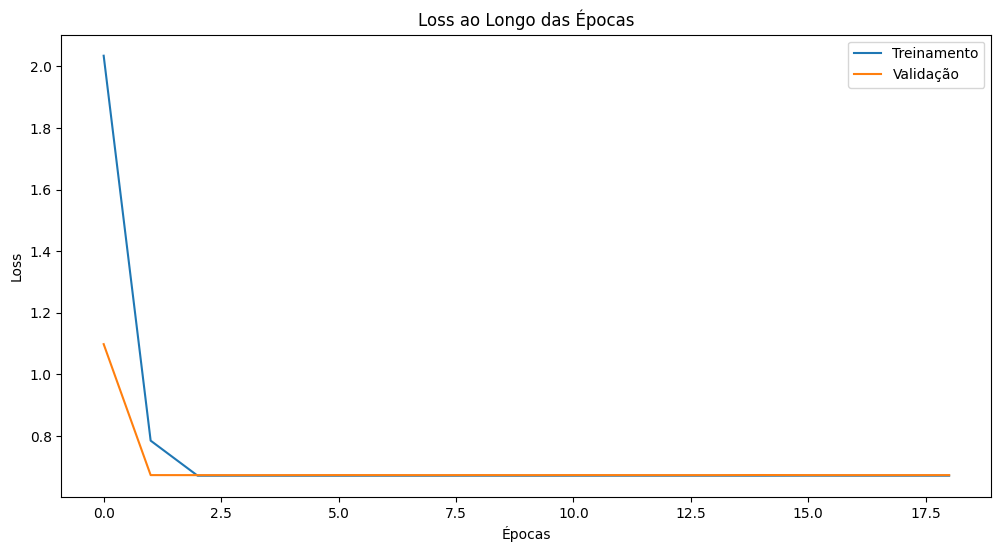

In [24]:
# Bloco de Código para a questão 6

def metricas_regressao(X_test_note, y_test_note, scaler_y_regressao, model):

    # 1. Fazer previsões usando o modelo fornecido
    predict = model.predict(X_test_note)

    # 2. Inverter a transformação para obter os valores originais (não normalizados)
    predict = scaler_y_regressao.inverse_transform(predict)
    real = scaler_y_regressao.inverse_transform(y_test_note)

    # 3. Calcular R2 e R2 ajustado
    k = X_test_note.shape[1]  # número de características independentes
    n = len(X_test_note)  # tamanho da amostra
    r2 = sm.r2_score(real, predict)
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)  # fórmula para R2 ajustado

    # 4. Imprimir métricas
    print('Root Mean Square Error:', round(np.sqrt(np.mean(np.array(predict) - np.array(real))**2), 2))
    print('Mean Square Error:', round(sm.mean_squared_error(real, predict), 2))
    print('Mean Absolut Error:', round(sm.mean_absolute_error(real, predict), 2))
    print('Median Absolut Error:', round(sm.median_absolute_error(real, predict), 2))
    print('Explain Variance Score:', round(sm.explained_variance_score(real, predict) * 100, 2))
    print('R2 score:', round(sm.r2_score(real, predict) * 100, 2))
    print('Adjusted R2 =', round(adj_r2, 3) * 100)

def plot_loss(history):
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Treinamento')
    plt.plot(history.history['val_loss'], label='Validação')
    plt.title('Loss ao Longo das Épocas')
    plt.xlabel('Épocas')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Criar modelo
model_regressao = Sequential()
model_regressao.add(Dense(20, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))
model_regressao.add(Dense(20, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))
model_regressao.add(Dense(20, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))
model_regressao.add(Dense(1, activation='sigmoid'))  # Saída sigmoidal para classificação binária

# Compilar modelo
model_regressao.compile(loss='binary_crossentropy', optimizer='adam')

# Configurar Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=15, verbose=1, restore_best_weights=True)

# Treinar modelo com o Early Stopping como callback
history = model_regressao.fit(X_train_note,
                    y_train_note,
                    epochs=40,
                    batch_size=20,
                    validation_data=(X_val_note, y_val_note),
                    callbacks=[early_stopping])
model_regressao
clear_output(wait=True)
metricas_regressao(X_test_note, y_test_note, scaler_y_regressao, model_regressao)
plot_loss(history)

# 7 - Avaliação
- Exiba no mínimo 3 métricas com os dados de teste para avaliar o modelo em questão. Podem ser criadas funções para métricas.

- Exiba a matriz de confusão dos valores preditos.

In [ ]:
# Bloco de Código para a questão 7


# 8 - Grid Search Bitcoin
Considerando a estrutura do modelo para prever o bitcoin no dia seguinte, faça um grid search que verifique:
- Qual a melhor quantidade de neurônios para a primeira camada oculta entre os valores 30, 50, ou 55;
- Qual a melhor quantidade de neurônios para a segunda camada oculta entre os valores 25, 12, ou 36;
- Qual a melhor quantidade de neurônios para a terceira camada oculta entre os valores 10, 100, ou 55;
- Qual o melhor valor para o Dropout entre os valores 0.1, 0.2, ou 0.3 (vai ser o mesmo valor para todos os Dropouts);
- Treine o modelo grid com 25 épocas;
- Exiba quais os melhores prâmetros encontrados;
- Crie uma variável que irá receber o melhor modelo;
- Exiba algumas métricas para os valores de teste e o gráfico comparando valores reais e preditos pelo melhor modelo.

In [26]:
# Bloco de Código para a questão 8 - Treinar o Grid e exibir os melhores parâmetros
def create_model(neurons1=128, neurons2=64, neurons3=32, dropout_rate=0.2):
    model = Sequential()
    model.add(Dense(neurons1, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons2, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons3, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))  # Camada de saída para regressão
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Criando o modelo KerasRegressor
model = KerasRegressor(build_fn=create_model, verbose=0)

# Definindo os parâmetros para a busca em grid
param_grid = {
    'neurons1': [30, 50, 55],
    'neurons2': [25, 12, 36],
    'neurons3': [10, 100, 55],
    'dropout_rate': [0.1, 0.2, 0.3]
}

# Criando o objeto GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=3)

# Realizando a busca em grid usando os dados de treinamento
grid_search.fit(X_train, y_train)

# Criando uma instância do KerasRegressor para regressão.
# O modelo é construído usando a função 'create_model_regressao' e será treinado por 20 épocas.
# O parâmetro 'verbose=0' garante que nenhum log de treinamento seja impresso durante o treinamento.
model_for_grid_reg = KerasRegressor(build_fn=create_model, epochs=25, verbose=0)


# Imprimindo os melhores parâmetros e o melhor score
print("Melhores parâmetros encontrados:")
print(grid_search.best_params_)
print("Melhor score encontrado:")
print(grid_search.best_score_)

<ipython-input-26-f7795096fff6>:15: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_model, verbose=0)


Melhores parâmetros encontrados:
{'dropout_rate': 0.1, 'neurons1': 50, 'neurons2': 36, 'neurons3': 100}
Melhor score encontrado:
-0.02843204451104005


<ipython-input-26-f7795096fff6>:34: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_for_grid_reg = KerasRegressor(build_fn=create_model, epochs=25, verbose=0)


In [ ]:
# Bloco de Código para a questão 8 - Exibir métricas e gráfico
def create_model_classificacao(neurons1=128, neurons2=64, neurons3=32, dropout_rate=0.2):
    model = Sequential()
    model.add(Dense(neurons1, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons2, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons3, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))  # Camada de saída para regressão
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

model_for_grid_clas = KerasRegressor(build_fn=create_model_classificacao, epochs=25, verbose=0)

param_grid = {
    'neurons1': [30, 50, 55],
    'neurons2': [25, 12, 36],
    'neurons3': [10, 100, 55],
    'dropout_rate': [0.1, 0.2, 0.3]
}

grid_clas = GridSearchCV(estimator=model_for_grid_clas, param_grid=param_grid, n_jobs=-1, cv=3)


grid_result_clas = grid_clas.fit(X_train, y_train)

print(f"Melhores parâmetros: {grid_result_clas.best_params_}")


best_model_clas = grid_result_clas.best_estimator_.model

metricas_regressao(X_test, y_test, best_model_clas)

# 9 - Random Search Bitcoin
Considerando a estrutura do modelo para prever o bitcoin no dia seguinte, faça um random search que verifique:
- Qual a melhor quantidade de neurônios para a primeira camada oculta entre os valores 30, 50, 55, 60, 65 ou 70;
- Qual a melhor quantidade de neurônios para a segunda camada oculta entre os valores 25, 12, 36, 72 ou 100;
- Qual a melhor quantidade de neurônios para a terceira camada oculta entre os valores 10, 100, 55, 88, 12 ou 5;
- Qual o melhor valor para o Dropout entre os valores 0.1, 0.2, 0.3, 0.4, 0.5 ou 0.6 (vai ser o mesmo valor para todos os Dropouts);
- Defina para o modelo random testar 10 combinações aleatórias;
- Treine o modelo random com 25 épocas;
- Exiba quais os melhores prâmetros encontrados;
- Crie uma variável que irá receber o melhor modelo;
- Exiba algumas métricas para os valores de teste e o gráfico comparando valores reais e preditos pelo melhor modelo.

In [ ]:
# Bloco de Código para a questão 9 - Treinar o Random e exibir os melhores parâmetros
param_dist = {
    # Especificando diferentes funções de ativação para a rede neural.
    'activation': [
        'relu',      # Função de retificação linear.
        'tanh',      # Função tangente hiperbólica.
        'sigmoid',   # Função sigmoidal.
        'elu',       # Função linear exponencial.
        'selu',      # Função escalonada linear exponencial.
        'softplus',  # Função suavizadora baseada em log.
        'softsign'   # Função que retorna x / (abs(x) + 1).
    ],

    # Especificando diferentes taxas de aprendizado para o otimizador.
    'learn_rate': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5],

    # Definindo diferentes tamanhos de lotes (batch sizes) para o treinamento.
    'batch_size': [8, 16, 32, 64, 128, 256],

    # Especificando diferentes valores para a regularização L1.
    # Isso ajuda a prevenir o ajuste excessivo, penalizando os pesos grandes.
    'l1': [0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001, 0.00005],

    # Especificando diferentes valores para a regularização L2.
    # Assim como a L1, a L2 também penaliza os pesos, mas ao quadrado.
    'l2': [0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001, 0.00005],

    # Definindo diferentes taxas de dropout.
    # Dropout é uma técnica onde, durante o treinamento, aleatoriamente
    # "desligamos" certos neurônios, ajudando a prevenir o ajuste excessivo.
    'dropout_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
}
random_search_reg = RandomizedSearchCV(
    estimator=model_for_grid_reg,
    param_distributions=param_dist,
    n_iter=4,
    n_jobs=-1,
    cv=3
)


random_result_reg = random_search_reg.fit(X_train, y_train)


print(f"Melhores parâmetros usando RandomizedSearchCV: {random_result_reg.best_params_}")


best_model_reg = random_result_reg.best_estimator_.model


metricas_regressao(X_test, y_test, scaler_y_regressao, best_model_reg)

In [ ]:
# Bloco de Código para a questão 9 - Exibir métricas e gráfico
random_search_reg = RandomizedSearchCV(
    estimator=model_for_grid_reg,
    param_distributions=param_dist,
    n_iter=4,
    n_jobs=-1,
    cv=3
)


random_result_reg = random_search_reg.fit(X_train, y_train)

print(f"Melhores parâmetros usando RandomizedSearchCV: {random_result_reg.best_params_}")

best_model_reg = random_result_reg.best_estimator_.model

metricas_regressao(X_test, y_test, scaler_y_regressao, best_model_reg)

# 10 - Random Search notebooks
Considerando a estrutura do modelo para prever o bitcoin no dia seguinte, faça um random search que verifique:
- Qual a melhor quantidade de neurônios para a primeira camada oculta entre os valores 12, 21, 33, 45 ou 65;
- Qual a melhor quantidade de neurônios para a segunda camada oculta entre os valores 22, 5, 10, 35 ou 100;
- Qual a melhor quantidade de neurônios para a terceira camada oculta entre os valores 12, 99, 56, 88, 3 ou 30;
- Qual o melhor valor para o regularizador de kernel entre os valores 0.05, 0.02, 0.01, 0.1, 0.002, ou 0.03 (vai ser o mesmo valor para todos os regularizadores de kernel l1 e/ou l2);
- Defina para o modelo random testar 10 combinações
- Treine o modelo random com 25 épocas;
- Exiba quais os melhores prâmetros encontrados;
- Crie uma variável que irá receber o melhor modelo;
- Exiba algumas métricas e matriz de confusão para os valores de teste.

In [ ]:
# Bloco de Código para a questão 10 - Treinar o Random e exibir os melhores parâmetros
param_dist = {
    # Especificando diferentes funções de ativação para a rede neural.
    'activation': [
        'relu',      # Função de retificação linear.
        'tanh',      # Função tangente hiperbólica.
        'sigmoid',   # Função sigmoidal.
        'elu',       # Função linear exponencial.
        'selu',      # Função escalonada linear exponencial.
        'softplus',  # Função suavizadora baseada em log.
        'softsign'   # Função que retorna x / (abs(x) + 1).
    ],

    # Especificando diferentes taxas de aprendizado para o otimizador.
    'learn_rate': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5],

    # Definindo diferentes tamanhos de lotes (batch sizes) para o treinamento.
    'batch_size': [8, 16, 32, 64, 128, 256],

    # Especificando diferentes valores para a regularização L1.
    # Isso ajuda a prevenir o ajuste excessivo, penalizando os pesos grandes.
    'l1': [0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001, 0.00005],

    # Especificando diferentes valores para a regularização L2.
    # Assim como a L1, a L2 também penaliza os pesos, mas ao quadrado.
    'l2': [0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001, 0.00005],

    # Definindo diferentes taxas de dropout.
    # Dropout é uma técnica onde, durante o treinamento, aleatoriamente
    # "desligamos" certos neurônios, ajudando a prevenir o ajuste excessivo.
    'dropout_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
}
random_search_reg = RandomizedSearchCV(
    estimator=model_for_grid_reg,
    param_distributions=param_dist,
    n_iter=4,
    n_jobs=-1,
    cv=3
)


random_result_reg = random_search_reg.fit(X_train_note, y_train_note)


print(f"Melhores parâmetros usando RandomizedSearchCV: {random_result_reg.best_params_}")


best_model_reg = random_result_reg.best_estimator_.model


metricas_regressao(X_test_note, y_test_note, scaler_y_regressao, best_model_reg)

In [ ]:
# Bloco de Código para a questão 10 - Exibir métricas e matriz de confusão
random_search_reg = RandomizedSearchCV(
    estimator=model_for_grid_reg,
    param_distributions=param_dist,
    n_iter=4,
    n_jobs=-1,
    cv=3
)


random_result_reg = random_search_reg.fit(X_train, y_train)

print(f"Melhores parâmetros usando RandomizedSearchCV: {random_result_reg.best_params_}")

best_model_reg = random_result_reg.best_estimator_.model

metricas_regressao(X_test_note, y_test_note, scaler_y_regressao, best_model_reg)